In [1]:
# เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# อ่านข้อมูลไฟล์ csv จาก https://github.com/nawinpoyen7/MachineLearning/blob/main/CustomerSegmentationClassification.csv 
# และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล
url='https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/Data%20Change.csv'
df=pd.read_csv(url)
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
183,460697,Male,1,40,1,Artist,4,1,4,Cat_6,C
842,462551,Male,1,53,1,Doctor,14,1,2,Cat_6,B
5284,466049,Female,0,25,1,Doctor,0,0,1,Cat_4,A
7259,460088,Female,1,33,1,Homemaker,1,2,2,Cat_6,D
3945,462038,Male,0,31,1,Artist,4,0,4,Cat_6,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null int64
Age                8068 non-null int64
Graduated          8068 non-null int64
Profession         8068 non-null object
Work_Experience    8068 non-null int64
Spending_Score     8068 non-null int64
Family_Size        8068 non-null int64
Var_1              8068 non-null object
Segmentation       8068 non-null object
dtypes: int64(7), object(4)
memory usage: 693.4+ KB


In [4]:
# นับจำนวน Profession ได้ดังนี้
df.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Doctor            812
Engineer          699
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [5]:
df.Gender.value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [6]:
df.Gender.value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [7]:
# นับจำนวน Var_1 ได้ดังนี้
df.Ever_Married.value_counts()

1    4643
0    3425
Name: Ever_Married, dtype: int64

In [8]:
# นับจำนวน Segmentation ได้ดังนี้ 
df.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [9]:
# นับจำนวน Var_1 ได้ดังนี้ 
df.Var_1.value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_1     209
Cat_7     203
Cat_5      85
Name: Var_1, dtype: int64

In [10]:
# 
#df.replace({'Cat_7':7},inplace=True)
#df.replace({'Cat_6':6},inplace=True)
#df.replace({'Cat_5':5},inplace=True)
#df.replace({'Cat_4':4},inplace=True)
#df.replace({'Cat_3':3},inplace=True)
#df.replace({'Cat_2':2},inplace=True)
#df.replace({'Cat_1':1},inplace=True)

In [11]:
#
#df

In [12]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index([u'ID', u'Gender', u'Ever_Married', u'Age', u'Graduated', u'Profession',
       u'Work_Experience', u'Spending_Score', u'Family_Size', u'Var_1',
       u'Segmentation'],
      dtype='object')

In [13]:
# ทดลองเเสดงค่าเฉลี่ยนในเเต่ละคุณลักษณะของProfession
df.groupby('Gender').mean()

,ID,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
Gender,,,,,,,
Female,463461.643933,0.511641,42.911531,0.643111,2.678444,0.496028,2.718707
Male,463493.738058,0.628254,43.925968,0.610822,2.303147,0.587503,2.894272


In [14]:
#บอกค่าที่หายไปในแต่ละcolumn
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [15]:
# ในตัวอย่างนี้เลือกพิจารณาเพียง 4 หัวข้อ (Age) (Work_Experience)(Spending_Score)(Family_Size)

# สร้างตัวเเปร ชื่อ cols เพื่อเก็บตัวเเปรที่สนใน ได้เเก่ Age Work_Experience Spending_Score Family_Size

In [16]:
cols=['Ever_Married','Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']

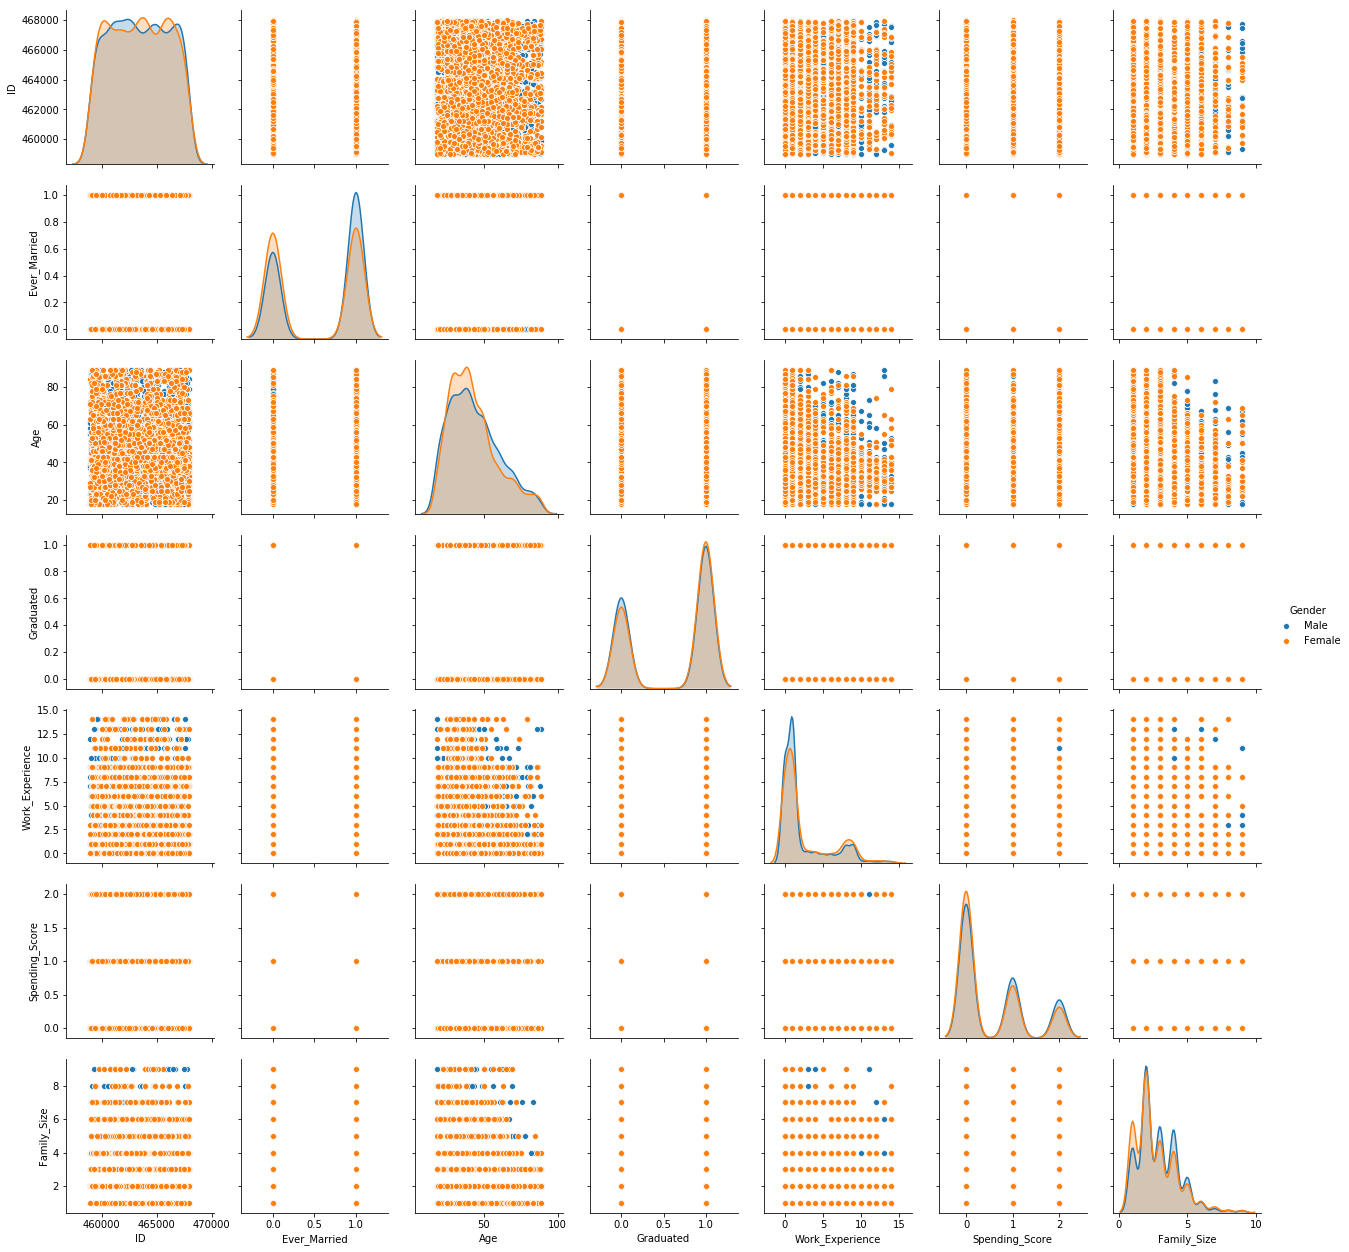

In [17]:
sns.pairplot(data=df,hue='Gender');

In [18]:
# จัดกลุ่มข้อมูล (Classification) ด้วยวิธี K-Nearest Neighbours โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ KNeighborsClassifier StandardScaler เเละ train_test_split จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization

In [19]:
# แบ่งชุดข้อมูลออกเป็นชุดฝึกฝนเเละชุดทดสอบ
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['Ever_Married','Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']], 
    df.Gender, 
    test_size=test_size, random_state=7)

In [20]:
y_train.head()

6606    Female
1355      Male
1067      Male
4217      Male
7793    Female
Name: Gender, dtype: object

In [21]:
X_train.head()

,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
6606,1,62,1,0,2,2
1355,1,56,1,1,1,3
1067,1,48,0,1,1,4
4217,1,81,0,1,0,1
7793,0,36,1,7,0,3


In [22]:
# สร้างแบบจำลอง K-Nearest Neighbours ด้วยคลาส KNeighborsClassifier ใน Sklearn
prefer_k = 5  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
# ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า  R2
model.score(X_train, y_train)

0.7022001859312055

In [25]:
model.score(X_test, y_test)

0.5446096654275093

In [26]:
# ทดลองทดสอบประสิทธิภาพแบบจำลองด้วย cross validation
from sklearn.model_selection import cross_val_score 

In [27]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.5693261 , 0.51742835, 0.53834237, 0.56390395, 0.54263566])

In [28]:
# เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.546 (0.019)


In [29]:
# ทดลองเเสดงค่าผลทำนายจากชุดข้อมูลทดสอบ
predicted = model.predict(X_test)

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted,target_names=df.Gender.unique(), digits=3))

              precision    recall  f1-score   support

        Male      0.494     0.448     0.470       727
      Female      0.580     0.623     0.601       887

   micro avg      0.545     0.545     0.545      1614
   macro avg      0.537     0.536     0.535      1614
weighted avg      0.541     0.545     0.542      1614



In [31]:
# ทดสอบทำนายผลด้วยค่ากำหนดเอง เช่น
#predicted = model.predict([
#[5, 3, 1.2, .3],
#[5.432, 3.1, 2.3, .7],
#[6.5, 3, 5, 2]
#             ])

In [32]:
#y_solution = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 'Marketing']

In [33]:
# ทดลองเเสดงค่าที่ทำนายผลถูก
#dx=pd.DataFrame({'y_true': y_solution, 'y_pred': predicted})
#dx[dx.y_true == dx.y_pred]

In [34]:
# ทดลองหาค่า k ที่เหมาะสมที่สุด

In [36]:
# กำหนดช่วงค่า K ที่ต้องการทดสอบให้เท่ากับ 1 ถึง 1000
k_list = list(range(1,1000+1))
k_values = dict(n_neighbors=k_list)

In [37]:
# ปรับจูนพารามิเตอร์ของแบบจำลองโดยใช้ Library ชื่อ GridSearchCV ของ scikit-learn 
# เพื่อทดสอบประสิทธิภาพของแบบจำลองสำหรับค่าพารามิเตอร์ต่าง ๆ ร่วมกับการประเมินผลด้วย cross-validation

In [38]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

In [39]:
# เรียนรู้แบบจำลอง
grid.fit(df[['Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Spending_Score']], df.Gender)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...81, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
# แสดงค่าประสิทธิภาพที่ได้
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\dep

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0240,0.1616,0.520079,0.674207,1,{u'n_neighbors': 1},998,0.513313,0.670696,0.520446,...,0.536888,0.672192,0.522629,0.671727,0.507130,0.672347,0.000632,0.004224,0.010025,0.004966
1,0.0276,0.1772,0.500744,0.627386,2,{u'n_neighbors': 2},1000,0.494737,0.623276,0.495663,...,0.517669,0.626491,0.502170,0.628350,0.493490,0.631294,0.003720,0.013090,0.008977,0.002604
2,0.0252,0.1846,0.526896,0.667110,3,{u'n_neighbors': 3},996,0.534985,0.661243,0.517968,...,0.526348,0.671882,0.525728,0.669713,0.529448,0.669558,0.001600,0.013544,0.005539,0.004138
3,0.0246,0.2092,0.512395,0.641299,4,{u'n_neighbors': 4},999,0.506502,0.635983,0.501239,...,0.512089,0.641363,0.501550,0.641208,0.540608,0.648335,0.001356,0.043000,0.014646,0.004016
4,0.0272,0.1888,0.537432,0.656172,5,{u'n_neighbors': 5},993,0.538080,0.653804,0.542751,...,0.535648,0.657785,0.527588,0.655461,0.543087,0.658559,0.002482,0.009495,0.005670,0.001747


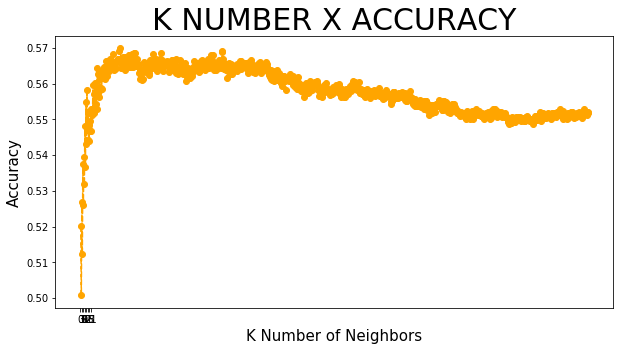

In [41]:
# ทดลองพล็อตกราฟค่าประสิทธิภาพ
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,24,3),)
plt.show()

In [42]:
# เเสดงค่า k ที่ให้ประสิทธิภาพสูงสุด
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 79} with 0.569905800694 of accuracy.
